In [1]:
### FITTING MULTI LINEAR REGRESSION MODEL FOR MICROINSURANCE DATASET

In [2]:
## Modules required
import pandas as pd
import seaborn as sns
import numpy as np
import pylab
import math
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [4]:
## Load the dataset into pandas
MICDATA=pd.read_excel('MIP.xlsx')

## set the index equal to the year column
MICDATA.index = MICDATA['Year']
MICDATA = MICDATA.drop(['Year', 'CCODE'], axis = 1)
MICDATA.head()

,ADR,PSIZE,PGR,PPOOR,PIUI,MTSUBS,PPLRA,GDPCAPITA,EODB,NETIPC,...,BUSFRD,OPOE,FISFRED,FINSF,PROPR,INFREED,FRAGSTAT,GOVSIZE,RULELAW,LABOURFRE
Year,,,,,,,,,,,,,,,,,,,,,
2014,6.1,2089,1.30,19.3,36.7,84.2,33.6,17264.4,50.9,1.5,...,46,59,83,83,30,70,64.5,19.9,0.6,69.7
2014,6.0,10287,2.79,40.1,6.0,163.3,54.8,2975.9,50.7,-2.8,...,50,59,82,82,25,70,78.2,10.2,-0.5,50.5
2014,4.7,17586,2.98,40.1,9.4,71.0,73.1,1917.4,51.4,-0.2,...,61,59,83,83,30,75,89.0,15.5,-0.5,55.0
2014,5.2,22648,2.47,46.3,19.3,97.6,51.0,4161.9,51.2,0.2,...,46,60,83,83,38,80,101.7,12.3,-0.6,59.0
2014,8.2,90425,2.21,40.0,33.9,105.4,57.2,10353.7,51.3,9.8,...,52,60,81,81,42,80,91.0,11.8,-0.7,45.7


In [5]:
## Get the summary of our original data set
desc_MICDATA = MICDATA.describe()

## Add the standard deviation metric
desc_MICDATA.loc['+3_std']=desc_MICDATA.loc['mean']+(desc_MICDATA.loc['std']*3)
desc_MICDATA.loc['-3_std']=desc_MICDATA.loc['mean']-(desc_MICDATA.loc['std']*3)
desc_MICDATA

,ADR,PSIZE,PGR,PPOOR,PIUI,MTSUBS,PPLRA,GDPCAPITA,EODB,NETIPC,...,BUSFRD,OPOE,FISFRED,FINSF,PROPR,INFREED,FRAGSTAT,GOVSIZE,RULELAW,LABOURFRE
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.982727,35981.772727,2.369909,38.969091,27.357273,91.099091,59.253636,5362.656364,57.983636,2.530000,...,56.518182,57.227273,74.909091,75.045455,38.372727,53.318182,85.877273,15.360909,-0.334545,56.416364
std,1.904695,42083.907775,0.704372,18.140379,16.668437,34.064428,16.577744,4943.311515,7.745025,4.190237,...,11.444106,6.278928,6.347065,6.482703,12.878301,15.463441,11.584113,5.534149,0.422625,15.779958
min,3.700000,2089.000000,1.000000,2.200000,1.200000,31.100000,30.600000,37.500000,43.800000,-10.100000,...,35.000000,36.000000,61.000000,61.000000,10.000000,5.000000,62.000000,4.400000,-1.400000,22.200000
25%,5.025000,11747.000000,1.800000,25.400000,14.425000,70.475000,49.775000,1956.550000,51.325000,0.000000,...,48.250000,54.000000,71.000000,71.000000,30.000000,45.000000,74.675000,10.650000,-0.600000,45.700000
50%,5.400000,19495.500000,2.500000,40.050000,21.950000,87.450000,57.300000,3446.800000,57.950000,1.850000,...,56.000000,58.000000,76.000000,76.000000,35.000000,55.000000,87.800000,14.800000,-0.400000,54.850000
75%,6.300000,39293.000000,2.800000,51.500000,41.200000,114.600000,73.775000,7268.075000,65.300000,5.425000,...,65.750000,60.000000,79.000000,79.000000,45.750000,65.000000,96.875000,19.000000,-0.100000,64.000000
max,12.300000,195875.000000,3.900000,73.200000,64.800000,163.900000,83.900000,29461.400000,76.500000,15.800000,...,81.000000,72.000000,86.000000,86.000000,70.000000,80.000000,103.500000,27.900000,0.600000,90.900000
+3_std,11.696813,162233.496051,4.483026,93.390228,77.362583,193.292374,108.986868,20192.590907,81.218712,15.100710,...,90.850499,76.064057,93.950287,94.493563,77.007629,99.708506,120.629613,31.963356,0.933331,103.756237
-3_std,0.268641,-90269.950597,0.256792,-15.452046,-22.648037,-11.094192,9.520405,-9467.278180,34.748560,-10.040710,...,22.185865,38.390489,55.867895,55.597346,-0.262174,6.927858,51.124933,-1.241538,-1.602421,9.076490


In [6]:
## Data preprocessing ##
## How is the distribution of the dependent variables?

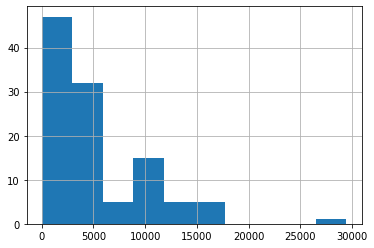

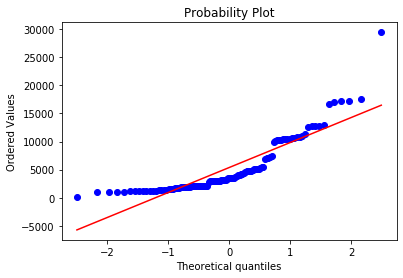

In [7]:
## Condisder GDPCAPITA
GDPCAPITA = MICDATA.GDPCAPITA

pd.Series(GDPCAPITA).hist()
plt.show()


stats.probplot(GDPCAPITA, dist="norm", plot=pylab)
pylab.show()

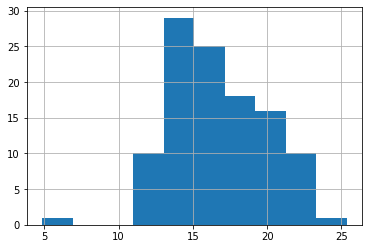

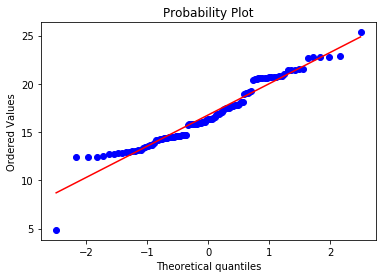

lambda parameter for Box-Cox Transformation is 0.154979042225755


In [8]:
## Performing data transformation on this variable for normality
GDPCAPITA_bc, lmda = stats.boxcox(GDPCAPITA)
pd.Series(GDPCAPITA_bc).hist()
plt.show()

stats.probplot(GDPCAPITA_bc, dist = "norm", plot=pylab)
pylab.show()
print("lambda parameter for Box-Cox Transformation is {}".format(lmda))



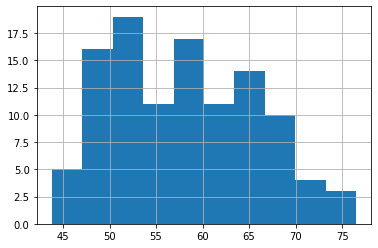

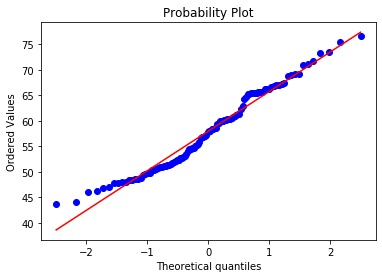

In [9]:
## Condisder EODB
EODB = MICDATA.EODB

pd.Series(EODB).hist()
plt.show()


stats.probplot(EODB, dist="norm", plot=pylab)
pylab.show()

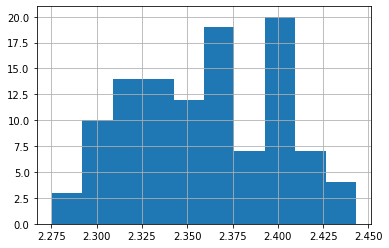

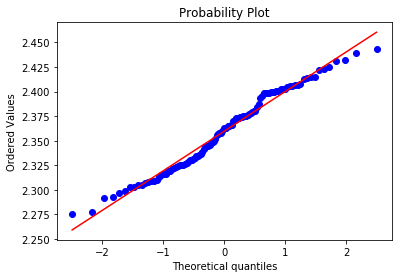

lambda parameter for Box-Cox Transformation is -0.29586192328220007


In [10]:
## Performing data transformation on this variable for normality
EODB_bc, lmda = stats.boxcox(EODB)
pd.Series(EODB_bc).hist()
plt.show()

stats.probplot(EODB_bc, dist= "norm", plot=pylab)
pylab.show()
print("lambda parameter for Box-Cox Transformation is {}".format(lmda))

In [11]:
MICDATA["GDPCAPITA"] = GDPCAPITA_bc
MICDATA["EODB"] = EODB_bc


In [12]:
## Checking the Model Assumptions
######## Multicolinearity #################
## printing out correlation matrix of the data frame
corr=MICDATA.corr()

## Display the correlation matrix
display(corr)

,ADR,PSIZE,PGR,PPOOR,PIUI,MTSUBS,PPLRA,GDPCAPITA,EODB,NETIPC,...,BUSFRD,OPOE,FISFRED,FINSF,PROPR,INFREED,FRAGSTAT,GOVSIZE,RULELAW,LABOURFRE
ADR,1.000000,0.030680,-0.611861,-0.556588,0.695094,-0.299324,-0.616613,0.547977,0.019781,0.004836,...,-0.042811,0.020813,-0.022139,-0.019923,0.093058,0.061770,-0.464979,0.176861,0.213744,0.047432
PSIZE,0.030680,1.000000,0.094497,0.065800,0.124953,-0.226541,0.024948,0.098270,-0.087027,0.145848,...,-0.093083,0.038039,0.083895,0.067335,0.066310,0.028876,0.415850,-0.186448,-0.210256,-0.160195
PGR,-0.611861,0.094497,1.000000,0.325237,-0.678652,0.167922,0.696683,-0.645003,-0.026281,-0.102905,...,0.056206,0.067650,0.086104,0.078981,-0.026464,0.053345,0.504736,-0.497503,-0.183136,0.098049
PPOOR,-0.556588,0.065800,0.325237,1.000000,-0.492520,0.103529,0.447905,-0.463263,0.016480,0.084990,...,0.042807,-0.046260,0.009585,-0.000651,-0.079693,-0.073791,0.489528,0.042897,-0.449296,-0.500778
PIUI,0.695094,0.124953,-0.678652,-0.492520,1.000000,-0.175795,-0.788620,0.733561,0.057410,0.058498,...,0.001449,-0.062065,-0.139834,-0.141906,0.113285,-0.094320,-0.498654,0.155583,0.344960,0.100977
MTSUBS,-0.299324,-0.226541,0.167922,0.103529,-0.175795,1.000000,-0.117787,0.007299,-0.083916,-0.102081,...,-0.060946,-0.177615,-0.154676,-0.128116,-0.128429,-0.162266,-0.099830,-0.055702,-0.025792,-0.136783
PPLRA,-0.616613,0.024948,0.696683,0.447905,-0.788620,-0.117787,1.000000,-0.794682,0.000864,-0.023747,...,0.048292,0.085067,0.051734,0.031461,-0.045826,0.021578,0.702706,-0.227099,-0.431541,0.051531
GDPCAPITA,0.547977,0.098270,-0.645003,-0.463263,0.733561,0.007299,-0.794682,1.000000,-0.065193,0.027391,...,0.000299,-0.101902,0.009102,0.023324,-0.054256,0.016541,-0.533971,0.144807,0.459583,0.226044
EODB,0.019781,-0.087027,-0.026281,0.016480,0.057410,-0.083916,0.000864,-0.065193,1.000000,-0.089948,...,0.513646,0.528543,0.013281,0.012195,0.525017,0.177774,-0.126987,0.171040,0.026725,0.023265
NETIPC,0.004836,0.145848,-0.102905,0.084990,0.058498,-0.102081,-0.023747,0.027391,-0.089948,1.000000,...,-0.170331,-0.188628,-0.034633,-0.052434,-0.072719,-0.229367,0.168502,-0.077737,-0.226578,-0.300709


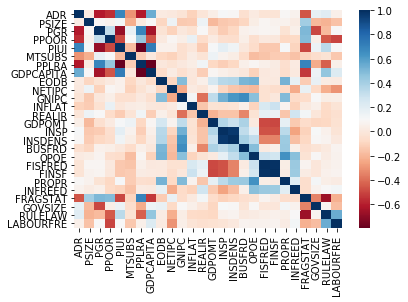

In [13]:
## plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap="RdBu")

In [15]:
### Using the VIF to measure to detect the above and dropping all variable with greater than 10 VIF
MICDATA_before = MICDATA
MICDATA_after = MICDATA.drop(['INSP','INSDENS','FINSF','FISFRED'], axis = 1)


x1 = sm.tools.add_constant(MICDATA_before)
x2 = sm.tools.add_constant(MICDATA_after)

#Create a series for both

series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index = x1.columns)
series_after = pd.Series([variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])], index = x2.columns)

## dispay the series
print('DATA BEFORE')
print('-'*100)
display(series_before)


print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const        8729.757645
ADR             3.107165
PSIZE           2.297918
PGR             4.128128
PPOOR           2.804681
PIUI            5.627507
MTSUBS          2.012982
PPLRA           9.847382
GDPCAPITA       5.328740
EODB            2.642033
NETIPC          1.548182
GNIPC           4.833878
INFLAT          1.804035
REALIR          1.882680
GDPOMT          2.623938
INSP           35.807158
INSDENS        38.308651
BUSFRD          2.706156
OPOE            3.660262
FISFRED        70.465545
FINSF          78.539785
PROPR           2.536503
INFREED         2.345924
FRAGSTAT        6.029620
GOVSIZE         1.928608
RULELAW         3.348187
LABOURFRE       3.427146
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const        7585.137412
ADR             3.036182
PSIZE           2.103950
PGR             4.066705
PPOOR           2.789351
PIUI            5.193476
MTSUBS          1.938321
PPLRA           9.429384
GDPCAPITA       5.282560
EODB            2.175506
NETIPC          1.491947
GNIPC           3.015144
INFLAT          1.220124
REALIR          1.663160
GDPOMT          1.597663
BUSFRD          2.459771
OPOE            3.098097
PROPR           2.371582
INFREED         1.935270
FRAGSTAT        5.269763
GOVSIZE         1.883271
RULELAW         3.254729
LABOURFRE       3.398448
dtype: float64

In [16]:
MICDATA_after

,ADR,PSIZE,PGR,PPOOR,PIUI,MTSUBS,PPLRA,GDPCAPITA,EODB,NETIPC,...,REALIR,GDPOMT,BUSFRD,OPOE,PROPR,INFREED,FRAGSTAT,GOVSIZE,RULELAW,LABOURFRE
Year,,,,,,,,,,,,,,,,,,,,,
2014,6.1,2089,1.30,19.3,36.7,84.2,33.6,22.815761,2.323239,1.5,...,6.6,53.9,46,59,30,70,64.5,19.9,0.6,69.7
2014,6.0,10287,2.79,40.1,6.0,163.3,54.8,15.835205,2.322008,-2.8,...,8.5,50.4,50,59,25,70,78.2,10.2,-0.5,50.5
2014,4.7,17586,2.98,40.1,9.4,71.0,73.1,14.367418,2.326291,-0.2,...,6.0,48.7,61,59,30,75,89.0,15.5,-0.5,55.0
2014,5.2,22648,2.47,46.3,19.3,97.6,51.0,17.024449,2.325075,0.2,...,0.4,55.0,46,60,38,80,101.7,12.3,-0.6,59.0
2014,8.2,90425,2.21,40.0,33.9,105.4,57.2,20.586021,2.325684,9.8,...,0.0,54.1,52,60,42,80,91.0,11.8,-0.7,45.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,12.3,11565,1.10,5.2,64.2,77.9,31.1,20.749287,2.344390,1.5,...,9.7,71.5,35,36,10,35,72.1,20.6,0.0,52.9
2018,3.8,42729,3.70,40.9,23.7,127.7,76.2,14.697302,2.303410,-0.3,...,4.8,65.2,38,38,10,10,95.1,8.4,-0.3,83.9
2018,8.1,57793,1.40,55.5,56.2,57.3,33.6,21.431980,2.400098,0.0,...,0.4,69.2,70,54,46,55,72.9,21.3,-0.1,60.1


In [17]:
#### Building the model ####
## considering GDP PER CAPITA as our dependent Variable ##
## ## Full Model, MODEL 4
## define our input variable and our output variable where ###
x = MICDATA_after.drop(['GDPCAPITA', 'EODB'], axis = 1)
y = MICDATA_after[['GDPCAPITA']]

In [18]:
y

,GDPCAPITA
Year,
2014,22.815761
2014,15.835205
2014,14.367418
2014,17.024449
2014,20.586021
...,...
2018,20.749287
2018,14.697302
2018,21.431980


In [19]:
x

,ADR,PSIZE,PGR,PPOOR,PIUI,MTSUBS,PPLRA,NETIPC,GNIPC,INFLAT,REALIR,GDPOMT,BUSFRD,OPOE,PROPR,INFREED,FRAGSTAT,GOVSIZE,RULELAW,LABOURFRE
Year,,,,,,,,,,,,,,,,,,,,
2014,6.1,2089,1.30,19.3,36.7,84.2,33.6,1.5,1550,-1.3,6.6,53.9,46,59,30,70,64.5,19.9,0.6,69.7
2014,6.0,10287,2.79,40.1,6.0,163.3,54.8,-2.8,1460,-3.1,8.5,50.4,50,59,25,70,78.2,10.2,-0.5,50.5
2014,4.7,17586,2.98,40.1,9.4,71.0,73.1,-0.2,1460,-0.6,6.0,48.7,61,59,30,75,89.0,15.5,-0.5,55.0
2014,5.2,22648,2.47,46.3,19.3,97.6,51.0,0.2,1730,4.7,0.4,55.0,46,60,38,80,101.7,12.3,-0.6,59.0
2014,8.2,90425,2.21,40.0,33.9,105.4,57.2,9.8,1890,2.4,0.0,54.1,52,60,42,80,91.0,11.8,-0.7,45.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,12.3,11565,1.10,5.2,64.2,77.9,31.1,1.5,2370,-0.3,9.7,71.5,35,36,10,35,72.1,20.6,0.0,52.9
2018,3.8,42729,3.70,40.9,23.7,127.7,76.2,-0.3,2570,2.2,4.8,65.2,38,38,10,10,95.1,8.4,-0.3,83.9
2018,8.1,57793,1.40,55.5,56.2,57.3,33.6,0.0,3500,9.3,0.4,69.2,70,54,46,55,72.9,21.3,-0.1,60.1


In [20]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)

 

In [21]:
x_train = x_train_minmax
x_test= x_test_minmax 

In [22]:
## Create an instance of our model
regression_model = LinearRegression()

## Full Model
## Fit the model
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
##Grab the intercept and the coeffitients
intercept = regression_model.intercept_[0]
coef = regression_model.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('_'*100)

## Loop through dictionary and print the data
for cf in zip(x.columns, coef):
    print("The Coeffitient for {} is {:.4}".format(cf[0],cf[1]))

The intercept for our model is 13.02
____________________________________________________________________________________________________
The Coeffitient for ADR is 2.37
The Coeffitient for PSIZE is 3.716
The Coeffitient for PGR is -4.188
The Coeffitient for PPOOR is 1.321
The Coeffitient for PIUI is -0.889
The Coeffitient for MTSUBS is 2.083
The Coeffitient for PPLRA is -7.18
The Coeffitient for NETIPC is 2.361
The Coeffitient for GNIPC is 0.1835
The Coeffitient for INFLAT is 1.402
The Coeffitient for REALIR is 0.5876
The Coeffitient for GDPOMT is 1.056
The Coeffitient for BUSFRD is 1.035
The Coeffitient for OPOE is 0.9198
The Coeffitient for PROPR is -3.544
The Coeffitient for INFREED is 0.6097
The Coeffitient for FRAGSTAT is 1.687
The Coeffitient for GOVSIZE is 0.7237
The Coeffitient for RULELAW is 1.109
The Coeffitient for LABOURFRE is 6.05


In [24]:
## Getting multiple prediction
y_predict = regression_model.predict(x_test)

## Show the first five
y_predict[:5]

array([[16.0520286 ],
       [23.00798756],
       [11.62202215],
       [14.29720225],
       [16.7722525 ]])

In [25]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [26]:
## Testing the Model Assumptions
# Heteroscedasticity using the Breusch-Pegan test

#H0:σ2=σ2
#H1:σ2!=σ2

## Grab the p-values 
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('_'*100)
          
if pval > 0.05:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.")
else:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, and conclude that there is heteroscedasticity.")

0.2789281173234255 0.28220594985872044
____________________________________________________________________________________________________
For the Breusch Pagan's Test
The p-value was 0.2789
we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.


The number of lags will be 10
____________________________________________________________________________________________________
(array([4.73742557e-04, 3.41369372e-01, 2.32866176e+00, 2.75648695e+00,
       3.86777597e+00, 6.56650812e+00, 6.59623787e+00, 6.96856441e+00,
       9.35597746e+00, 9.35696643e+00]), array([0.98263491, 0.84308737, 0.50705232, 0.59936693, 0.56860587,
       0.36280062, 0.47209296, 0.54002812, 0.40508414, 0.49859411]))
The lowest p-value found was 0.3628
we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.
____________________________________________________________________________________________________


C:\Users\AGYEMANG ERIC\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


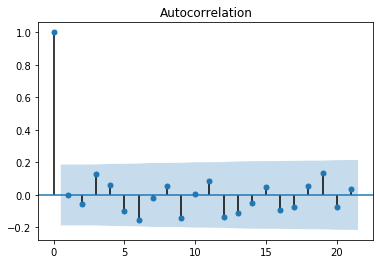

In [27]:
### Checking for Autocorrelation using the Ljungbox test
#H0: The data are random
#H1: The data are not random

## Calculate the lag
lag = min(10, (len(x)//5))
print('The number of lags will be {}'.format(lag))
print('_'*100)

## Perform the test          
test_results = diag.acorr_ljungbox(est.resid, lags = lag)
 
## print the result for the test
print(test_results)

## Grab the P-Value and the test statistics
ibvalue, p_val = test_results          
          

## print the result for the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.")
    print('_'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we reject the null hypothesis, and conclude that there is Autocorrelation.")
    print('_'*100)
    
## Plotting Autocorrelation
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag

sm.graphics.tsa.plot_acf(est.resid)
plt.show()

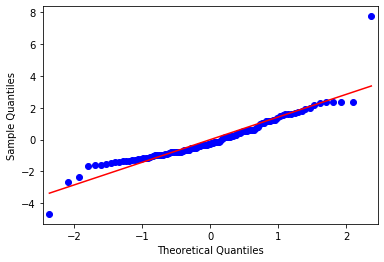

-5.179856543691131e-13

In [28]:
## Check for Linearity of the residuals using the Q-Q plot
import pylab
sm.qqplot(est.resid, line = 's')
pylab.show()

## Checking that mean of the residuals is approximately zero
mean_residuals = sum(est.resid)/len(est.resid)
mean_residuals

In [29]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 3.45
MAE 1.42
RMSE 1.86


In [30]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              GDPCAPITA   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     18.79
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           8.46e-24
Time:                        18:17:07   Log-Likelihood:                -195.08
No. Observations:                 110   AIC:                             432.2
Df Residuals:                      89   BIC:                             488.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2631      3.827      3.988      0.0

In [31]:
#### Building the model ####
## considering Demographic Variables on GDPCAPITA as our dependent Variable ##

## define our input variable and our output variable where ###

x = MICDATA_after.drop(['GDPCAPITA','EODB','NETIPC','GNIPC','INFLAT','OPOE','REALIR','GDPOMT','PROPR','BUSFRD','INFREED','GOVSIZE','FRAGSTAT','RULELAW','LABOURFRE'], axis = 1)
y = MICDATA_after[['GDPCAPITA']]

In [32]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)



In [33]:
## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)



In [34]:
x_train = x_train_minmax
x_test= x_test_minmax 

In [35]:
## Create an instance of our model
regression_model1 = LinearRegression()

## Fit the model
regression_model1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
##Grab the intercept and the coeffitients
intercept = regression_model1.intercept_[0]
coef = regression_model1.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('_'*100)

## Loop through dictionary and print the data
for cf in zip(x.columns, coef):
    print("The Coeffitient for {} is {:.4}".format(cf[0],cf[1]))

The intercept for our model is 19.28
____________________________________________________________________________________________________
The Coeffitient for ADR is -0.3738
The Coeffitient for PSIZE is 2.438
The Coeffitient for PGR is -2.61
The Coeffitient for PPOOR is -1.325
The Coeffitient for PIUI is 2.592
The Coeffitient for MTSUBS is 1.497
The Coeffitient for PPLRA is -4.775


In [37]:
## Getting multiple prediction
y_predict = regression_model1.predict(x_test)

## Show the first five
y_predict[:5]

array([[17.074286  ],
       [20.00753787],
       [11.03408811],
       [17.63012334],
       [18.38491505]])

In [38]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [39]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.66
MAE 1.35
RMSE 1.63


In [40]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              GDPCAPITA   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     32.60
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           2.36e-23
Time:                        18:18:04   Log-Likelihood:                -221.39
No. Observations:                 110   AIC:                             458.8
Df Residuals:                     102   BIC:                             480.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.9261      2.533      9.840      0.0

In [41]:
## MODEL 2 Economic Variables on GDPCAPITA

In [42]:
#### Building the model ####

## define our input variable and our output variable where ###
x = MICDATA.drop(['GDPCAPITA', 'EODB','PPLRA','PGR','ADR','PSIZE','PPOOR','PIUI', 'FISFRED','BUSFRD','OPOE','FINSF','PROPR','INFREED', 'FRAGSTAT','LABOURFRE','GOVSIZE' ], axis = 1)
y = MICDATA['GDPCAPITA']

In [43]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

 

In [44]:
## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [45]:
x_train = x_train_minmax
x_test= x_test_minmax 

In [46]:
## Create an instance of our model
regression_model2 = LinearRegression()

## Fit the model
regression_model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
## Getting multiple prediction
y_predict = regression_model2.predict(x_test)

## Show the first five
y_predict[:5]

array([16.77010435, 21.53480789, 16.43681438, 17.60893829, 16.56901946])

In [48]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [49]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.09
MAE 2.39
RMSE 2.66


In [50]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              GDPCAPITA   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.911
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           0.000276
Time:                        18:18:36   Log-Likelihood:                -269.41
No. Observations:                 110   AIC:                             558.8
Df Residuals:                     100   BIC:                             585.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2196      1.288     13.372      0.0

In [51]:
## MODEL 3 Institutional Variables on GDPCAPITA

In [52]:
#### Building the model ####

## define our input variable and our output variable where ###
x = MICDATA.drop(['GDPCAPITA','ADR', 'PSIZE','PGR', 'PPOOR','MTSUBS','PIUI','PPLRA','EODB','NETIPC','GNIPC','INFLAT','REALIR','GDPOMT','INSP','INSDENS','RULELAW'], axis = 1)
y = MICDATA['GDPCAPITA']

In [53]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)



In [54]:
## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [55]:
x_train = x_train_minmax
x_test= x_test_minmax

In [56]:
## Create an instance of our model
regression_model3 = LinearRegression()

## Fit the model
regression_model3.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
## Getting multiple prediction
y_predict = regression_model3.predict(x_test)

## Show the first five
y_predict[:5]

array([17.26257915, 20.81672841, 15.87317849, 15.4067103 , 13.36537945])

In [58]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [59]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.41
MAE 2.4
RMSE 2.72


In [60]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              GDPCAPITA   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     5.432
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           4.73e-06
Time:                        18:18:52   Log-Likelihood:                -264.11
No. Observations:                 110   AIC:                             548.2
Df Residuals:                     100   BIC:                             575.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7532      4.772      6.235      0.0

In [61]:
## Ease of Doing Business as Dependent Variable

In [62]:
#### Building the model ####
## ## Full Model, MODEL 4
## define our input variable and our output variable where ###
x = MICDATA.drop(['GDPCAPITA', 'EODB'], axis = 1)
y = MICDATA['EODB']

In [63]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [64]:
x_train = x_train_minmax
x_test= x_test_minmax

In [65]:
## Create an instance of our model
regression_model = LinearRegression()

## Full Model
## Fit the model
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
## Getting multiple prediction
y_predict = regression_model.predict(x_test)

## Show the first five
y_predict[:5]

array([2.3346373 , 2.34792004, 2.35017585, 2.39039793, 2.34418535])

In [67]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [68]:
## Testing the Model Assumptions
# Heteroscedasticity using the Breusch-Pegan test

#H0:σ2=σ2
#H1:σ2!=σ2

## Grab the p-values 
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('_'*100)
          
if pval > 0.05:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.")
else:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, and conclude that there is heteroscedasticity.")

0.08835092202508726 0.06804216117252071
____________________________________________________________________________________________________
For the Breusch Pagan's Test
The p-value was 0.08835
we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.


The number of lags will be 10
____________________________________________________________________________________________________
(array([0.16265425, 2.94882463, 3.49175875, 4.63283128, 4.79761024,
       5.03809605, 5.17463163, 6.95281111, 8.43283403, 8.5679221 ]), array([0.68672448, 0.22891322, 0.32183256, 0.32708635, 0.44107621,
       0.53893639, 0.63866156, 0.54173248, 0.49118255, 0.57353989]))
The lowest p-value found was 0.2289
we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.
____________________________________________________________________________________________________


C:\Users\AGYEMANG ERIC\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


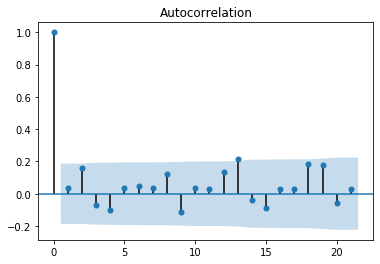

In [69]:
### Checking for Autocorrelation using the Ljungbox test
#H0: The data are random
#H1: The data are not random

## Calculate the lag
lag = min(10, (len(x)//5))
print('The number of lags will be {}'.format(lag))
print('_'*100)

## Perform the test          
test_results = diag.acorr_ljungbox(est.resid, lags = lag)
 
## print the result for the test
print(test_results)

## Grab the P-Value and the test statistics
ibvalue, p_val = test_results          
          

## print the result for the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.")
    print('_'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we reject the null hypothesis, and conclude that there is Autocorrelation.")
    print('_'*100)
    
## Plotting Autocorrelation
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag

sm.graphics.tsa.plot_acf(est.resid)
plt.show()

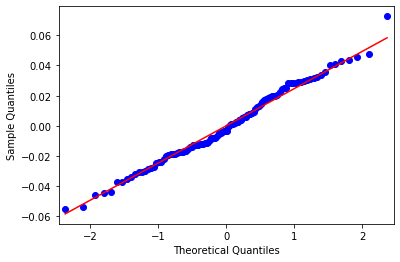

-9.489378979568838e-14

In [70]:
## Check for Linearity of the residuals using the Q-Q plot
import pylab
sm.qqplot(est.resid, line = 's')
pylab.show()

## Checking that mean of the residuals is approximately zero
mean_residuals = sum(est.resid)/len(est.resid)
mean_residuals

In [71]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.00116
MAE 0.0279
RMSE 0.0341


In [72]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   EODB   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     5.737
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           8.51e-10
Time:                        18:19:34   Log-Likelihood:                 251.25
No. Observations:                 110   AIC:                            -452.5
Df Residuals:                      85   BIC:                            -385.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1173      0.085     24.775      0.0

In [73]:
## Model one(1) with Demographic variables on EODB
rt

In [74]:
#### Building the model ####

## define our input variable and our output variable where ###
x = MICDATA_after.drop(['GDPCAPITA','EODB','NETIPC','GNIPC','INFLAT','OPOE','REALIR','GDPOMT','PROPR','BUSFRD','INFREED','GOVSIZE','FRAGSTAT','RULELAW','LABOURFRE'], axis = 1)
y = MICDATA_after[['EODB']]

In [75]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)


In [76]:
## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [77]:
x_train = x_train_minmax
x_test= x_test_minmax

In [78]:
## Create an instance of our model
regression_model1 = LinearRegression()

## Fit the model
regression_model1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
##Grab the intercept and the coeffitients
intercept = regression_model1.intercept_[0]
coef = regression_model1.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('_'*100)

## Loop through dictionary and print the data
for cf in zip(x.columns, coef):
    print("The Coeffitient for {} is {:.4}".format(cf[0],cf[1]))

The intercept for our model is 2.374
____________________________________________________________________________________________________
The Coeffitient for ADR is 0.002777
The Coeffitient for PSIZE is -0.03355
The Coeffitient for PGR is 0.002493
The Coeffitient for PPOOR is 0.0002963
The Coeffitient for PIUI is 0.006493
The Coeffitient for MTSUBS is -0.03579
The Coeffitient for PPLRA is 0.004833


In [80]:
## Getting multiple prediction
y_predict = regression_model1.predict(x_test)

## Show the first five
y_predict[:5]

array([[2.34517479],
       [2.36601389],
       [2.378532  ],
       [2.361083  ],
       [2.35055719]])

In [81]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [82]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.00172
MAE 0.0382
RMSE 0.0415


In [83]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   EODB   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.4805
Date:                Tue, 28 Jul 2020   Prob (F-statistic):              0.847
Time:                        18:20:35   Log-Likelihood:                 200.06
No. Observations:                 110   AIC:                            -384.1
Df Residuals:                     102   BIC:                            -362.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3452      0.055     42.703      0.0

In [84]:
## MODEL 2 ECONOMIC variables on EODB as the Dependent Variables

In [85]:
#### Building the model ####

## define our input variable and our output variable where ###
x = MICDATA.drop(['GDPCAPITA', 'EODB','PPLRA','PGR','ADR','PSIZE','PPOOR','PIUI', 'FISFRED','BUSFRD','OPOE','PROPR','INFREED', 'FRAGSTAT','LABOURFRE','GOVSIZE' ], axis = 1)
y = MICDATA['EODB']


In [86]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)



In [87]:
## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [88]:
x_train = x_train_minmax
x_test= x_test_minmax

In [89]:
## Create an instance of our model
regression_model2 = LinearRegression()

## Fit the model
regression_model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
## Getting multiple prediction
y_predict = regression_model2.predict(x_test)

## Show the first five
y_predict[:5]

array([2.36604596, 2.3346389 , 2.38346977, 2.39681948, 2.34943468])

In [91]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [92]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.00154
MAE 0.0314
RMSE 0.0392


In [93]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   EODB   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     6.155
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           3.02e-07
Time:                        18:21:05   Log-Likelihood:                 224.87
No. Observations:                 110   AIC:                            -427.7
Df Residuals:                      99   BIC:                            -398.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2054      0.063     35.257      0.0

In [94]:
## MODEL 3 Institutional Variables on EODB


In [95]:
#### Building the model ####

## define our input variable and our output variable where ###
x = MICDATA.drop(['GDPCAPITA','EODB','ADR', 'PSIZE','PGR', 'PPOOR','MTSUBS','PIUI','PPLRA','NETIPC','GNIPC','INFLAT','REALIR','GDPOMT','INSP','INSDENS','RULELAW'], axis = 1)
y = MICDATA['EODB']

In [96]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)



In [97]:
## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [98]:
x_train = x_train_minmax
x_test= x_test_minmax

In [99]:
## Create an instance of our model
regression_model3 = LinearRegression()

## Fit the model
regression_model3.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
## Getting multiple prediction
y_predict = regression_model3.predict(x_test)

## Show the first five
y_predict[:5]

array([2.35946757, 2.37971028, 2.33214354, 2.40067095, 2.38599314])

In [101]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [102]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.000798
MAE 0.0217
RMSE 0.0282


In [103]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   EODB   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     8.291
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           3.90e-09
Time:                        18:21:44   Log-Likelihood:                 228.94
No. Observations:                 110   AIC:                            -437.9
Df Residuals:                     100   BIC:                            -410.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2289      0.054     41.306      0.0

In [1]:
## Microinsurance Density the Dependent Variable

In [2]:
## Modules required
import pandas as pd
import seaborn as sns
import numpy as np
import pylab
import math
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [4]:
## Load the dataset into pandas
MICDATA=pd.read_excel('INSDENSITY.xlsx')

## set the index equal to the year column
MICDATA.index = MICDATA['Year']
MICDATA = MICDATA.drop(['Year', 'CCODE','Premiums'], axis = 1)
MICDATA.head()

,ADR,PSIZE,PGR,PPOOR,MTSUBS,PPLRA,PIUI,GDPCAPITA,EODB,MICROIDENSITY,...,OPOE,FISFRED,FINSF,INSDENS,PROPR,INFREED,FRAGSTAT,GOVSIZE,RULELAW,LABOURFRE
Year,,,,,,,,,,,,,,,,,,,,,
2014,6.1,2089,1.30,19.3,84.2,33.6,36.7,17264.4,50.9,214.207755,...,59,83,83,6,30,70,64.5,19.9,0.6,69.7
2014,6.0,10287,2.79,40.1,163.3,54.8,6.0,2975.9,50.7,2.962069,...,59,82,82,5,25,70,62.8,20.6,0.6,70.0
2014,4.7,17586,2.98,40.1,71.0,73.1,9.4,1917.4,51.4,2.422325,...,59,83,83,6,30,75,78.2,10.2,-0.5,50.5
2014,5.2,22648,2.47,46.3,97.6,51.0,19.3,4161.9,51.2,11.069101,...,60,83,83,7,38,80,64.5,11.4,-0.5,53.2
2014,8.2,90425,2.21,40.0,105.4,57.2,33.9,10353.7,51.3,22.581366,...,60,81,81,8,42,80,75.7,10.4,-0.6,49.9


In [5]:
## Get the summary of our original data set
desc_MICDATA = MICDATA.describe()

## Add the standard deviation metric
desc_MICDATA.loc['+3_std']=desc_MICDATA.loc['mean']+(desc_MICDATA.loc['std']*3)
desc_MICDATA.loc['-3_std']=desc_MICDATA.loc['mean']-(desc_MICDATA.loc['std']*3)
desc_MICDATA

,ADR,PSIZE,PGR,PPOOR,MTSUBS,PPLRA,PIUI,GDPCAPITA,EODB,MICROIDENSITY,...,OPOE,FISFRED,FINSF,INSDENS,PROPR,INFREED,FRAGSTAT,GOVSIZE,RULELAW,LABOURFRE
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,5.648000,36965.060000,2.397800,40.838000,94.780000,60.162000,22.988000,4732.73000,55.732000,41.175528,...,57.140000,77.000000,77.300000,36.540000,37.160000,55.900000,86.538000,15.508000,-0.36200,55.150000
std,1.569511,44968.890005,0.654633,17.813053,34.319787,15.037570,14.308249,4064.35313,6.962918,146.029449,...,7.202636,6.449173,6.643241,58.990560,13.453412,17.891111,11.720258,5.349455,0.42083,16.751512
min,3.700000,2089.000000,1.000000,2.200000,31.100000,32.200000,1.200000,1027.20000,43.800000,0.000880,...,38.000000,61.000000,61.000000,3.000000,10.000000,10.000000,62.800000,6.500000,-1.40000,22.200000
25%,4.775000,12010.500000,1.777500,31.250000,72.200000,52.325000,13.925000,1921.75000,50.550000,0.150317,...,53.000000,76.000000,76.000000,6.000000,30.000000,55.000000,77.675000,11.800000,-0.60000,43.425000
50%,5.200000,17848.500000,2.550000,40.100000,89.300000,57.650000,18.500000,3237.80000,55.100000,1.922896,...,57.500000,78.000000,78.000000,17.000000,34.000000,60.000000,87.500000,14.600000,-0.40000,54.000000
75%,6.075000,41603.000000,2.800000,53.150000,116.000000,73.075000,32.200000,5424.87500,60.075000,10.916821,...,60.000000,80.750000,81.750000,37.000000,44.750000,70.000000,97.375000,18.850000,-0.10000,63.625000
max,11.000000,195875.000000,3.890000,73.200000,163.900000,83.900000,57.100000,17264.40000,73.200000,927.988267,...,72.000000,86.000000,86.000000,226.000000,70.000000,80.000000,102.800000,27.900000,0.60000,90.900000
+3_std,10.356532,171871.730016,4.361698,94.277159,197.739360,105.274711,65.912746,16925.78939,76.620753,479.263876,...,78.747907,96.347520,97.229723,213.511679,77.520235,109.573332,121.698774,31.556365,0.90049,105.404537
-3_std,0.939468,-97941.610016,0.433902,-12.601159,-8.179360,15.049289,-19.936746,-7460.32939,34.843247,-396.912820,...,35.532093,57.652480,57.370277,-140.431679,-3.200235,2.226668,51.377226,-0.540365,-1.62449,4.895463


In [6]:
## Data preprocessing ##
## How is the distribution of the dependent variables?

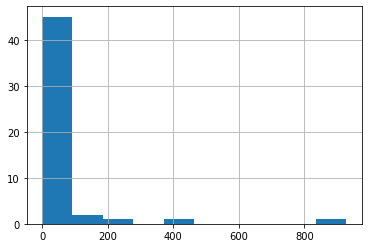

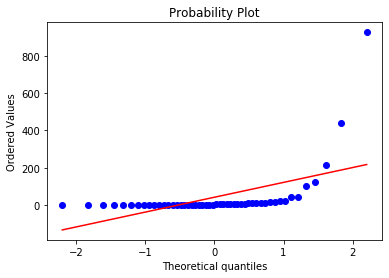

In [7]:
## Condisder GDPCAPITA
MICROIDENSITY = MICDATA.MICROIDENSITY

pd.Series(MICROIDENSITY).hist()
plt.show()


stats.probplot(MICROIDENSITY, dist="norm", plot=pylab)
pylab.show()

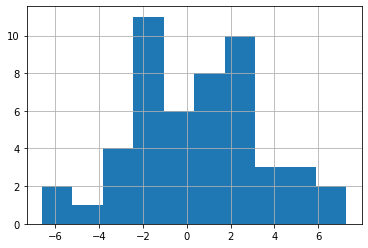

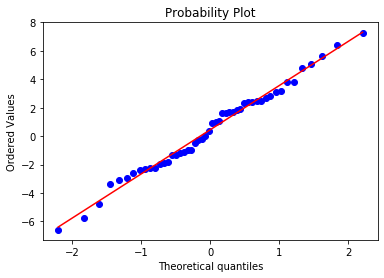

lambda parameter for Box-Cox Transformation is 0.01858074798886532


In [8]:
## Performing data transformation on this variable for normality
MICROIDENSITY_bc, lmda = stats.boxcox(MICROIDENSITY)
pd.Series(MICROIDENSITY_bc).hist()
plt.show()

stats.probplot(MICROIDENSITY_bc, dist = "norm", plot=pylab)
pylab.show()
print("lambda parameter for Box-Cox Transformation is {}".format(lmda))

In [9]:
MICDATA["MICROIDENSITY"] = MICROIDENSITY_bc

In [10]:
## Checking the Model Assumptions
######## Multicolinearity #################
## printing out correlation matrix of the data frame
corr=MICDATA.corr()

## Display the correlation matrix
display(corr)

,ADR,PSIZE,PGR,PPOOR,MTSUBS,PPLRA,PIUI,GDPCAPITA,EODB,MICROIDENSITY,...,OPOE,FISFRED,FINSF,INSDENS,PROPR,INFREED,FRAGSTAT,GOVSIZE,RULELAW,LABOURFRE
ADR,1.000000,0.045535,-0.544793,-0.495982,-0.286585,-0.583062,0.627958,0.556246,0.099354,0.258271,...,0.268202,0.206057,0.214482,0.129830,0.244060,0.209196,0.122148,-0.241730,0.104090,0.193209
PSIZE,0.045535,1.000000,0.135531,0.003529,-0.255565,-0.018706,0.243223,0.072116,-0.056371,-0.204200,...,0.125660,0.017539,-0.014057,0.028488,0.253831,-0.009953,-0.065809,-0.220449,0.082265,-0.010780
PGR,-0.544793,0.135531,1.000000,0.251493,0.265655,0.636899,-0.574610,-0.661430,-0.012176,-0.406803,...,0.050102,-0.028617,-0.042174,-0.014565,0.007433,-0.015684,-0.154360,0.059908,0.005421,-0.125164
PPOOR,-0.495982,0.003529,0.251493,1.000000,0.121014,0.424369,-0.433660,-0.474909,-0.064607,-0.191118,...,-0.208704,-0.059175,-0.084465,-0.137598,-0.094170,-0.197150,-0.034265,0.071242,-0.152544,-0.184454
MTSUBS,-0.286585,-0.255565,0.265655,0.121014,1.000000,-0.044152,-0.324752,-0.207996,-0.091988,-0.170489,...,-0.280848,-0.165600,-0.115452,-0.201800,-0.226861,-0.060279,-0.205856,0.278929,0.042628,-0.104958
PPLRA,-0.583062,-0.018706,0.636899,0.424369,-0.044152,1.000000,-0.731000,-0.732749,-0.089690,-0.325672,...,-0.022806,-0.170349,-0.214081,0.032699,-0.078825,-0.087787,0.059131,-0.044883,-0.163110,-0.146929
PIUI,0.627958,0.243223,-0.574610,-0.433660,-0.324752,-0.731000,1.000000,0.671494,0.085304,0.088457,...,0.010017,0.123852,0.121668,-0.029519,0.143762,-0.072146,0.051060,-0.073983,0.094300,0.204956
GDPCAPITA,0.556246,0.072116,-0.661430,-0.474909,-0.207996,-0.732749,0.671494,1.000000,0.075142,0.363639,...,0.088694,0.178305,0.225687,0.030845,0.054159,0.096720,-0.078006,-0.056408,0.153678,0.125531
EODB,0.099354,-0.056371,-0.012176,-0.064607,-0.091988,-0.089690,0.085304,0.075142,1.000000,0.110513,...,0.532663,0.293408,0.293625,0.569895,0.591155,0.437500,-0.168753,-0.190425,0.220429,0.004148
MICROIDENSITY,0.258271,-0.204200,-0.406803,-0.191118,-0.170489,-0.325672,0.088457,0.363639,0.110513,1.000000,...,0.301697,-0.047714,-0.075519,0.318209,0.081599,0.371801,-0.085565,-0.190885,0.055633,0.001893


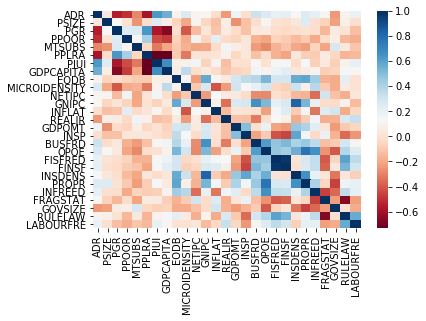

In [11]:
## plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap="RdBu")

In [12]:
### Using the VIF to measure to detect the above and dropping all variable with greater than 10 VIF
MICDATA_before = MICDATA
MICDATA_after = MICDATA.drop(['GNIPC','INSP','FISFRED','FINSF','PROPR','OPOE','INSDENS'], axis = 1)


x1 = sm.tools.add_constant(MICDATA_before)
x2 = sm.tools.add_constant(MICDATA_after)

#Create a series for both

series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index = x1.columns)
series_after = pd.Series([variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])], index = x2.columns)

## dispay the series
print('DATA BEFORE')
print('-'*100)
display(series_before)


print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const            2323.654213
ADR                 3.447838
PSIZE               3.093009
PGR                 4.551878
PPOOR               3.432209
MTSUBS              2.641924
PPLRA               7.322099
PIUI                7.805225
GDPCAPITA           4.346281
EODB                3.963702
MICROIDENSITY       4.365791
NETIPC              2.118109
GNIPC              22.735564
INFLAT              5.661394
REALIR              2.675618
GDPOMT              3.694810
INSP               13.006495
BUSFRD              5.028342
OPOE               15.382080
FISFRED            90.708341
FINSF             104.618522
INSDENS            48.987197
PROPR              15.537764
INFREED             9.981185
FRAGSTAT            7.147054
GOVSIZE             5.809380
RULELAW             6.371036
LABOURFRE           2.702041
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const            1118.255782
ADR                 3.200762
PSIZE               1.720518
PGR                 3.749777
PPOOR               2.172402
MTSUBS              2.225943
PPLRA               5.074229
PIUI                5.010898
GDPCAPITA           3.554869
EODB                1.876034
MICROIDENSITY       3.031838
NETIPC              1.583132
INFLAT              2.302950
REALIR              2.072323
GDPOMT              1.873073
BUSFRD              2.229894
INFREED             3.400018
FRAGSTAT            4.240866
GOVSIZE             2.621784
RULELAW             3.515114
LABOURFRE           2.085949
dtype: float64

In [13]:
MICDATA_after.head()

,ADR,PSIZE,PGR,PPOOR,MTSUBS,PPLRA,PIUI,GDPCAPITA,EODB,MICROIDENSITY,NETIPC,INFLAT,REALIR,GDPOMT,BUSFRD,INFREED,FRAGSTAT,GOVSIZE,RULELAW,LABOURFRE
Year,,,,,,,,,,,,,,,,,,,,
2014,6.1,2089,1.30,19.3,84.2,33.6,36.7,17264.4,50.9,5.643669,1.5,-1.3,6.6,53.9,46,70,64.5,19.9,0.6,69.7
2014,6.0,10287,2.79,40.1,163.3,54.8,6.0,2975.9,50.7,1.096917,-2.8,-3.1,8.5,50.4,50,70,62.8,20.6,0.6,70.0
2014,4.7,17586,2.98,40.1,71.0,73.1,9.4,1917.4,51.4,0.892040,-0.2,-0.6,6.0,48.7,61,75,78.2,10.2,-0.5,50.5
2014,5.2,22648,2.47,46.3,97.6,51.0,19.3,4161.9,51.2,2.458664,0.2,4.7,0.4,55.0,46,80,64.5,11.4,-0.5,53.2
2014,8.2,90425,2.21,40.0,105.4,57.2,33.9,10353.7,51.3,3.209163,9.8,2.4,0.0,54.1,52,80,75.7,10.4,-0.6,49.9


In [14]:
#### Building the model ####
## ## Full Model, MODEL 4
## define our input variable and our output variable where ###
x = MICDATA_after.drop(['GDPCAPITA', 'EODB','MICROIDENSITY'], axis = 1)
y = MICDATA_after['MICROIDENSITY']

In [15]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [16]:
x_train = x_train_minmax
x_test= x_test_minmax

In [17]:
## Create an instance of our model
regression_model = LinearRegression()

## Full Model
## Fit the model
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
## Getting multiple prediction
y_predict = regression_model.predict(x_test)

## Show the first five
y_predict[:5]

array([-10.28725939,  -1.69536856,  -1.00093312, -16.81009349,
         6.04171814])

In [19]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [20]:
## Testing the Model Assumptions
# Heteroscedasticity using the Breusch-Pegan test

#H0:σ2=σ2
#H1:σ2!=σ2

## Grab the p-values 
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('_'*100)
          
if pval > 0.05:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.")
else:
    print("For the Breusch Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("we reject the null hypothesis, and conclude that there is heteroscedasticity.")

0.5128858042999378 0.5810473278456139
____________________________________________________________________________________________________
For the Breusch Pagan's Test
The p-value was 0.5129
we fail to reject the null hypothesis, and conclude that there is no heteroscedasticity.


The number of lags will be 10
____________________________________________________________________________________________________
(array([0.8963008 , 1.72117104, 2.75161379, 3.13989125, 4.64299196,
       4.74161288, 6.21296389, 6.23516724, 6.2371272 , 8.22347034]), array([0.34377554, 0.42291438, 0.43152721, 0.53469388, 0.46098245,
       0.57735429, 0.51511458, 0.62090808, 0.71597101, 0.60701878]))
The lowest p-value found was 0.3438
we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.
____________________________________________________________________________________________________


C:\Users\AGYEMANG ERIC\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


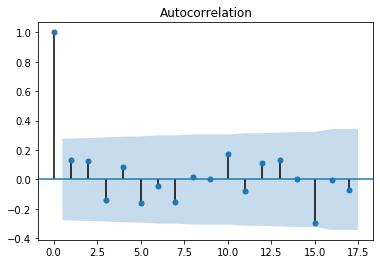

In [21]:
### Checking for Autocorrelation using the Ljungbox test
#H0: The data are random
#H1: The data are not random

## Calculate the lag
lag = min(10, (len(x)//5))
print('The number of lags will be {}'.format(lag))
print('_'*100)

## Perform the test          
test_results = diag.acorr_ljungbox(est.resid, lags = lag)
 
## print the result for the test
print(test_results)

## Grab the P-Value and the test statistics
ibvalue, p_val = test_results          
          

## print the result for the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we fail to reject the null hypothesis, and conclude that there is no Autocorrelation.")
    print('_'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("we reject the null hypothesis, and conclude that there is Autocorrelation.")
    print('_'*100)
    
## Plotting Autocorrelation
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag

sm.graphics.tsa.plot_acf(est.resid)
plt.show()

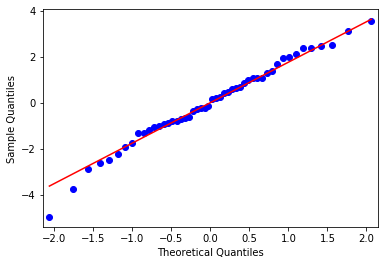

9.79500924813692e-13

In [22]:
## Check for Linearity of the residuals using the Q-Q plot
import pylab
sm.qqplot(est.resid, line = 's')
pylab.show()

## Checking that mean of the residuals is approximately zero
mean_residuals = sum(est.resid)/len(est.resid)
mean_residuals

In [23]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 50.1
MAE 5.77
RMSE 7.08


In [24]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          MICROIDENSITY   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     3.659
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           0.000765
Time:                        20:50:23   Log-Likelihood:                -99.129
No. Observations:                  50   AIC:                             234.3
Df Residuals:                      32   BIC:                             268.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3784      8.724      1.534      0.1

In [25]:
## Model one(1) with Demographic variables on MICROIDENSITY

In [26]:
#### Building the model ####

## define our input variable and our output variable where ###
x = MICDATA_after.drop(['MICROIDENSITY','GDPCAPITA','EODB','NETIPC','INFREED','INFLAT','REALIR','GDPOMT','BUSFRD','GOVSIZE','FRAGSTAT','RULELAW','LABOURFRE'], axis = 1)
y = MICDATA_after[['MICROIDENSITY']]

In [27]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)


In [28]:
## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [29]:
x_train = x_train_minmax
x_test= x_test_minmax

In [30]:
## Create an instance of our model
regression_model1 = LinearRegression()

## Fit the model
regression_model1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#Grab the intercept and the coeffitients
intercept = regression_model1.intercept_[0]
coef = regression_model1.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('_'*100)

## Loop through dictionary and print the data
for cf in zip(x.columns, coef):
    print("The Coeffitient for {} is {:.4}".format(cf[0],cf[1]))

The intercept for our model is 11.43
____________________________________________________________________________________________________
The Coeffitient for ADR is -0.9631
The Coeffitient for PSIZE is -1.751
The Coeffitient for PGR is -5.412
The Coeffitient for PPOOR is -0.8139
The Coeffitient for MTSUBS is -4.107
The Coeffitient for PPLRA is -4.129
The Coeffitient for PIUI is -6.79


In [32]:
## Getting multiple prediction
y_predict = regression_model1.predict(x_test)

## Show the first five
y_predict[:5]

array([[-1.38489263],
       [-2.96377451],
       [ 1.02736401],
       [-6.06497627],
       [ 2.62004028]])

In [33]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [34]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 5.25
MAE 1.79
RMSE 2.29


In [35]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          MICROIDENSITY   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     3.141
Date:                Tue, 28 Jul 2020   Prob (F-statistic):            0.00926
Time:                        20:50:27   Log-Likelihood:                -115.60
No. Observations:                  50   AIC:                             247.2
Df Residuals:                      42   BIC:                             262.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6720      5.265      3.166      0.0

In [36]:
## MODEL 2 Economic Variables on MICROIDENSITY

In [37]:
#### Building the model ####

## define our input variable and our output variable where ###
x = MICDATA.drop(['GDPCAPITA','MICROIDENSITY','EODB','MTSUBS','PPLRA','PGR','ADR','PSIZE','PPOOR','PIUI','FISFRED','FINSF','GNIPC','INSP','OPOE','INSDENS','INSP', 'FISFRED','BUSFRD','PROPR','INFREED','RULELAW', 'FRAGSTAT','LABOURFRE','GOVSIZE' ], axis = 1)
y = MICDATA['MICROIDENSITY']


In [38]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)


In [39]:
## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)


In [40]:
x_train = x_train_minmax
x_test= x_test_minmax

In [41]:
## Create an instance of our model
regression_model2 = LinearRegression()

## Fit the model
regression_model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
## Getting multiple prediction
y_predict = regression_model2.predict(x_test)

## Show the first five
y_predict[:5]

array([ 1.21874613,  1.06986987, -3.73415579, -4.25161896,  5.00898042])

In [43]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [44]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 19.7
MAE 3.95
RMSE 4.44


In [45]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          MICROIDENSITY   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     5.833
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           0.000720
Time:                        20:50:31   Log-Likelihood:                -115.68
No. Observations:                  50   AIC:                             241.4
Df Residuals:                      45   BIC:                             250.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1145      1.202      0.095      0.9

In [46]:
## MODEL 3 Institutional Variables on MICROIDENSITY

In [47]:
#### Building the model ####

## define our input variable and our output variable where ###
x = MICDATA.drop(['GDPCAPITA','MICROIDENSITY', 'EODB','ADR','PPOOR', 'PSIZE','PGR','PROPR','MTSUBS','PIUI','PPLRA','NETIPC','GNIPC','OPOE','INFLAT','REALIR','GDPOMT','INSP','INSDENS','FISFRED','FINSF'], axis = 1)
y = MICDATA['MICROIDENSITY']

In [48]:
## Split dataset into training and testing portion
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)


In [49]:
## Scale the independent variables gives
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np

min_max_scaler= preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax = min_max_scaler.fit_transform(x_test)

In [50]:
x_train = x_train_minmax
x_test= x_test_minmax

In [51]:
## Create an instance of our model
regression_model3 = LinearRegression()

## Fit the model
regression_model3.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
## Getting multiple prediction
y_predict = regression_model3.predict(x_test)

## Show the first five
y_predict[:5]

array([-2.40277859,  0.17380311,  0.52796509, -0.28057403,  2.43015296])

In [53]:
## Evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Define our input variable
x2 = sm.add_constant(x)

## Create an OLS model
model = sm.OLS(y, x2)

## fit the data
est = model.fit()

In [54]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

## Calculating the mean square Error
model_mse = mean_squared_error(y_test, y_predict)


## Calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

## Calculate the root mean squared error
model_rmse = math.sqrt(model_mse)


## Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 9.25
MAE 2.25
RMSE 3.04


In [55]:
## Model summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:          MICROIDENSITY   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.351
Date:                Tue, 28 Jul 2020   Prob (F-statistic):              0.256
Time:                        20:50:34   Log-Likelihood:                -121.81
No. Observations:                  50   AIC:                             257.6
Df Residuals:                      43   BIC:                             271.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5181      7.097     -0.637      0.5